In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
#Importation du fichier 2016_Building_Energy_Benchmarking.csv
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [249]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [250]:
data.shape 

(3376, 46)

Notre fichier comporte 3376 lignes pour 46 colonnes.

In [251]:
#Affichage des variables disponibles
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [252]:
#Nombre de variable par type
data.dtypes.value_counts() 

float64    22
object     15
int64       8
bool        1
dtype: int64

Le dataframe est composé de 22 variables de type float, 8 de type int, 15 de type objets et 1 de type booléene.

On fait une bref description de chacune des variables : 
- OSEBuildingID : Identifiant des observations
- DataYear : Années de prélèvement (2016 pour toutes donc peu d'intérêt)
- BuildingType : Type de batiment (Résidentiel, Non résidentiel, Campus, etc...)
- PrimaryPropertyType : Utilisation principale de la propriété (Hotel, Restaurant, Laboratoire, etc...)
- PropertyName : Nom de la propriété
- Address : Adresse
- City : Villes (Il n'y a que Seattle donc peu d'intérêt)
- State : Etats (Il n'y a que Washington donc peu d'intérêt)
- ZipCode : Code postal utilisé aux Etats-Unis
- TaxParcelIdentificationNumber : Code PIN des propriétés du comté de King (Peut être intéressant si il donne des coordonnées pour les propriétés)
- CouncilDistrictCode : Code du conseil de District de la ville de Seattle (Entre 1 et 7) 
- Neighborhood : Quartier de la propriété
- Latitude : Latitude de la propriété
- Longitude : Longitude de la propriété
- YearBuilt : Année de construction
- NumberofBuildings : Nombre de bâtiments inclus dans le rapport de la propriété.
- NumberofFloors : Nombre d'étages
- PropertyGFATotal : Surface brut du plancher bâtiment + parking
- PropertyGFAParking : Espace total (en pied carré) de tous les types de stationnements (fermé, ouvert, partiellement fermé)
- PropertyGFABuilding(s) : Espace au sol total (en pieds carré) des zones intérieurs du (des) batiment(s)
- ListOfAllPropertyUseTypes : Toutes les utilisations de la propriété 
- LargestPropertyUseType : Activité principale de la propriété
- LargestPropertyUseTypeGFA : Surface de plancher brut de l'activité principale de la propriété
- SecondLargestPropertyUseType : Activité secondaire de la propriété (NaN signifiant ici qu'il n'y a pas d'activité secondaire, à ne pas traiter comme des valeurs manquantes)
- SecondLargestPropertyUseTypeGFA : Surface de plancher brut de l'activité secondaire de la propriété (NaN signifiant ici qu'il n'y a pas d'activité secondaire, à ne pas traiter comme des valeurs manquantes)
- ThirdLargestPropertyUseType : Activité tertiaire de la propriété (NaN signifiant ici qu'il n'y a pas d'activité tertiaire, à ne pas traiter comme des valeurs manquantes)
- ThirdLargestPropertyUseTypeGFA (NaN signifiant ici qu'il n'y a pas d'activité tertiaire, à ne pas traiter comme des valeurs manquantes)
- YearsENERGYSTARCertified : Années de certifications ENERGY STAR de la propriété (Potentiellement plusieurs)
- ENERGYSTARScore : Score (allant de 1 à 100) évaluant la performance énergétique globale de la propriété. Un score de 50 représente la médiane nationale
- SiteEUI(kBtu/sf) : Consommation d'énergie (sur l'année) de la propriété divisée par sa surface de plancher brute
- SiteEUIWN(kBtu/sf) : Consommation d'énergie (sur l'année) de la propriété divisée par sa surface de plancher brute normalisée par des conditions météorologiques moyennes (moyenne calculée sur 30 ans)
- SourceEUI(kBtu/sf) : Consommation d'énergie (sur l'année) de la propriété (inclus les pertes de production, de transmission et de distribution) divisée par sa surface de plancher brute
- SourceEUIWN(kBtu/sf) : Consommation d'énergie (sur l'année) de la propriété (inclus les pertes de production, de transmission et de distribution) divisée par sa surface de plancher brute normalisée par des conditions météorologiques moyennes (moyenne calculée sur 30 ans)
- SiteEnergyUse(kBtu) : Quantité annuelle d'énergie (toute énergie confondue) consommée par la propriété
- SiteEnergyUseWN(kBtu) : Quantité annuelle d'énergie (toute énergie confondue) consommée par la propriété normalisée par des conditions météorologiques moyennes (moyenne calculée sur 30 ans)
- SteamUse(kBtu) :  Quantité annuelle de vapeur consommée par la propriété
- Electricity(kWh) : Quantité annuelle d'éléctricité consommée par la propriété (inclus les systèmes renouvelables sur place) mesuré en kWh
- Electricity(kBtu) : Quantité annuelle d'éléctricité consommée par la propriété (inclus les systèmes renouvelables sur place) mesurée en kBtu
- NaturalGas(therms) : Quantité annuelle de gaz naturel consommée par la propriété (mesuré en thermes)
- NaturalGas(kBtu) : Quantité annuelle de gaz naturel consommée par la propriété (mesuré en kBtu)
- DefaultData : La propriété a utilisé des données par défaut pour au moins une caractéristique de la propriété
- Comments : Commentaires d'un propriétaire ou d'un agent du bâtiment pour mettre en contexte la consommation d'énergie du bâtiment (Colonne vide donc pas intéressante)
- ComplianceStatus : Si une propriété a satisfait aux exigences d'analyse comparative énergétique pour l'année de déclaration en cours (Compliant, Non compliant etc...)
- Outlier : Si une propriété est une valeur aberrante élevée ou basse ('High outlier', 'Low outlier', nan)
- TotalGHGEmissions : Quantité totale d'émissions de gaz à effet de serre de la propriété
- GHGEmissionsIntensity : Emissions totales de gaz à effet de serre divisées par la surface de plancher brute de la propriété

In [253]:
#On localise les valeurs traduisant le fait que la propriété est habitée ou non
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

Avant d'enlever de notre dataframe les habitations, on veut observer l'impact d'une telle décision.

In [254]:
#On créer data_NonResidential pour observer les changements dans un premier temps
non_habitation = ['NonResidential', 'Nonresidential COS',
       'SPS-District K-12', 'Campus', 'Nonresidential WA']
data_NonResidential = data[data['BuildingType'].isin(non_habitation)]

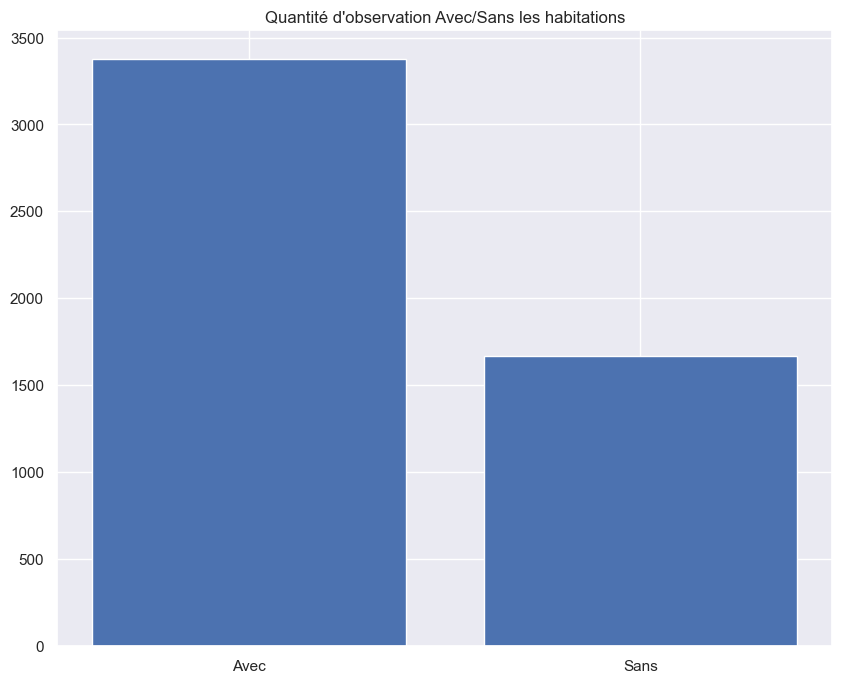

In [255]:
#Visualisation du avant/après
final = data_NonResidential.shape[0]
init = data.shape[0]
plt.bar(['Avec','Sans'], [init, final])
plt.rcParams['axes.axisbelow'] = True
plt.gca().yaxis.grid(True)
plt.title("Quantité d'observation Avec/Sans les habitations")
plt.show()

En retirant les habitations, on observe que notre dataframe est réduit de moitié. Dans un soucis de performance d'apprentissage de nos modèles on préferera garder les habitations (1500 observations n'étant pas assez).

In [256]:
#Nombre de doublons
data.duplicated(['PropertyName', 'Address']).sum()

0

In [257]:
#Mesure de la proportion totale de valeurs manquantes
data.isna().sum().sum()/(data.shape[0]*data.shape[1])

0.12847723057902327

In [258]:
#On mesure la proportion de valeurs manquantes pour les 46 variables
data.isna().mean().sort_values()

OSEBuildingID                      0.000000
PropertyGFABuilding(s)             0.000000
PropertyGFAParking                 0.000000
PropertyGFATotal                   0.000000
NumberofFloors                     0.000000
YearBuilt                          0.000000
Longitude                          0.000000
Latitude                           0.000000
Neighborhood                       0.000000
DefaultData                        0.000000
CouncilDistrictCode                0.000000
ComplianceStatus                   0.000000
State                              0.000000
City                               0.000000
Address                            0.000000
PropertyName                       0.000000
PrimaryPropertyType                0.000000
BuildingType                       0.000000
DataYear                           0.000000
TaxParcelIdentificationNumber      0.000000
SiteEnergyUse(kBtu)                0.001481
SiteEnergyUseWN(kBtu)              0.001777
SiteEUIWN(kBtu/sf)              

Si on enlève 'Comments', 'Outlier' et 'YearsENERGYSTARCertified' on observe qu'il y a peu de valeurs manquantes. En effet, pour 'SecondLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA' et 'ThirdLargestPropertyUseType' les valeurs manquantes indiquent ici qu'il n'y a pas d'activité secondaire/tertiaire. Ce n'est donc pas de l'information manquante.

Sélectionnons les variables pouvant être pertinentes pour notre analyse :

In [259]:
#Liste des variables à sélectionner 
var_a_selectionner = ['PrimaryPropertyType', 'Neighborhood', 'YearBuilt', 'Latitude', 'Longitude', 'NumberofFloors', 
                      'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseType', 
                      'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 
                      'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA','ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 
                      'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions', 
                      'GHGEmissionsIntensity', 'ListOfAllPropertyUseTypes', 'BuildingType']

In [260]:
#On sélectionne les variables pertinentes pour notre analyse
data = data[var_a_selectionner]

## Traitement des valeurs aberrantes

In [261]:
#On cherche les valeurs aberrantes "grossières"
data.describe()

,YearBuilt,Latitude,Longitude,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.000000,3376.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3.371000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3367.000000,3367.000000
mean,1968.573164,47.624033,-122.334795,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,5.403667e+06,2.745959e+05,3.707612e+06,1.368505e+06,119.723971,1.175916
std,33.088156,0.047758,0.027203,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,2.161063e+07,3.912173e+06,1.485066e+07,6.709781e+06,538.832227,1.821452
min,1900.000000,47.499170,-122.414250,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,-0.800000,-0.020000
25%,1948.000000,47.599860,-122.350662,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,9.251286e+05,0.000000e+00,6.394870e+05,0.000000e+00,9.495000,0.210000
50%,1975.000000,47.618675,-122.332495,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,1.803753e+06,0.000000e+00,1.177583e+06,3.237540e+05,33.920000,0.610000
75%,1997.000000,47.657115,-122.319407,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,4.222455e+06,0.000000e+00,2.829632e+06,1.189034e+06,93.940000,1.370000
max,2015.000000,47.733870,-122.220966,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000


On observe des valeurs minimales négatives pour Electricity(kBtu), TotalGHGEmissions et GHGEmissionsIntensity. Cela n'étant pas possible (on ne peut pas avoir une consommation/émission négative). On ramène ces valeurs à 0.

In [262]:
#On réctifie les valeurs pour Electricity(kBtu), TotalGHGEmissions et GHGEmissionsIntensity à 0
data.loc[data['Electricity(kBtu)'] < 0, 'Electricity(kBtu)'] = 0
data.loc[data['TotalGHGEmissions'] < 0, 'TotalGHGEmissions'] = 0
data.loc[data['GHGEmissionsIntensity'] < 0, 'GHGEmissionsIntensity'] = 0

On observe que pour le nombre d'étage la valeur du max est nettement supérieur à la moyenne, on stock donc les 20 plus grosses valeurs et on observe l'échantillon dans son ensemble.

In [263]:
#On sélectionne les plus grandes valeurs de NumberofFloors
aberrante_floors = data['NumberofFloors'].sort_values().index[-20:]

In [264]:
#Affichage des plus grandes valeurs
data.loc[aberrante_floors]

,PrimaryPropertyType,Neighborhood,YearBuilt,Latitude,Longitude,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,...,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ListOfAllPropertyUseTypes,BuildingType
1427,High-Rise Multifamily,DOWNTOWN,2008,47.60976,-122.33962,38,330693,260,330433,Multifamily Housing,...,47.0,62.900002,2.078139e+07,0.000000e+00,9366270.0,11415119.0,671.55,2.03,Multifamily Housing,Multifamily HR (10+)
2314,Mixed Use Property,DOWNTOWN,2009,47.61376,-122.33445,39,1074552,112124,962428,Multifamily Housing,...,65.0,43.000000,2.641677e+07,0.000000e+00,20663978.0,5752789.0,449.59,0.42,"Hotel, Multifamily Housing, Parking",NonResidential
3333,High-Rise Multifamily,DOWNTOWN,2015,47.61652,-122.33735,40,319481,41915,277566,Multifamily Housing,...,NaN,41.900002,1.540416e+07,0.000000e+00,9164908.0,6239252.0,395.26,1.24,"Multifamily Housing, Office, Other - Lodging/R...",Multifamily HR (10+)
3302,High-Rise Multifamily,DOWNTOWN,2014,47.61324,-122.33223,41,499477,0,499477,Multifamily Housing,...,40.0,67.099998,2.065785e+07,0.000000e+00,10250156.0,10370435.0,622.23,1.25,"Multifamily Housing, Parking, Restaurant",Multifamily HR (10+)
222,Large Office,DOWNTOWN,1986,47.60567,-122.33511,41,589921,129432,460489,Office,...,84.0,51.200001,2.460342e+07,0.000000e+00,24603417.0,0.0,171.52,0.29,"Office, Parking, Pre-school/Daycare",NonResidential
2,Hotel,DOWNTOWN,1969,47.61393,-122.33810,41,956110,196718,759392,Hotel,...,43.0,96.000000,7.258702e+07,2.156655e+07,49526664.0,1493800.0,2089.28,2.19,Hotel,NonResidential
577,Large Office,DOWNTOWN,1981,47.60573,-122.33028,42,1249055,201121,1047934,Office,...,95.0,38.000000,3.798071e+07,0.000000e+00,37980705.0,0.0,264.78,0.21,"Data Center, Medical Office, Office, Parking, ...",NonResidential
256,Large Office,DOWNTOWN,1912,47.60198,-122.33174,42,304346,0,304346,Office,...,72.0,88.400002,2.326224e+07,1.014422e+06,11239744.0,11008077.0,741.30,2.44,"Office, Other - Restaurant/Bar, Retail Store, ...",NonResidential
1428,High-Rise Multifamily,DOWNTOWN,2007,47.60634,-122.33184,42,170000,0,170000,Multifamily Housing,...,21.0,48.200001,8.188381e+06,0.000000e+00,4534702.0,3653679.0,225.66,1.33,Multifamily Housing,Multifamily HR (10+)
231,Large Office,DOWNTOWN,1973,47.60616,-122.33165,42,617684,171500,446184,Office,...,28.0,115.900002,6.951981e+07,8.829835e+05,68636822.0,0.0,546.65,0.88,"Financial Office, Office, Parking, Retail Store",NonResidential


Ainsi l'observation 1359 est aberrante. En effet, contrairement aux autres grandes valeurs qui la talonne, elle a une valeur pour PropertyGFATotal très petite. Après recherche, on sait que sa valeur est de 2 étages (Seattle Chinese Baptist Church). On la remplace donc.

In [265]:
#On réctifie le nombre d'étage
data.loc[1359, 'NumberofFloors'] = 2

In [266]:
#Pas de valeurs aberrantes sur ce point
data[data['PropertyGFATotal'] < data['PropertyGFAParking'] + data['PropertyGFABuilding(s)']]

,PrimaryPropertyType,Neighborhood,YearBuilt,Latitude,Longitude,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,...,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ListOfAllPropertyUseTypes,BuildingType


In [267]:
#Pas de valeurs aberrantes
data[data['LargestPropertyUseTypeGFA'] < data['SecondLargestPropertyUseTypeGFA']]

,PrimaryPropertyType,Neighborhood,YearBuilt,Latitude,Longitude,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,...,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ListOfAllPropertyUseTypes,BuildingType


In [268]:
#Pas de valeurs aberrantes
data[data['SecondLargestPropertyUseTypeGFA'] < data['ThirdLargestPropertyUseTypeGFA']]

,PrimaryPropertyType,Neighborhood,YearBuilt,Latitude,Longitude,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,...,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ListOfAllPropertyUseTypes,BuildingType


In [269]:
#Nombre de propriété par nombre d'étage
data['NumberofFloors'].value_counts()[:20]

3     692
4     692
1     466
2     440
6     306
5     295
7     148
8      64
11     32
10     32
13     21
12     21
9      18
0      16
14     13
17      9
16      7
24      7
23      7
18      7
Name: NumberofFloors, dtype: int64

On observe que 16 propriétés possèdent 0 étages, cela étant aberrant (Une propriété possède au moins 1 étage) on décide de réctifier la valeur à 1.

In [270]:
#On réctifie l'erreur par la valeur 1
data.loc[data['NumberofFloors'] == 0, 'NumberofFloors'] = 1

## Traitement des valeurs manquantes

In [271]:
#Affichage des proportions de valeurs manquantes par variable
data.isna().mean().sort_values()

PrimaryPropertyType                0.000000
PropertyGFABuilding(s)             0.000000
PropertyGFAParking                 0.000000
PropertyGFATotal                   0.000000
NumberofFloors                     0.000000
BuildingType                       0.000000
Latitude                           0.000000
YearBuilt                          0.000000
Neighborhood                       0.000000
Longitude                          0.000000
SiteEnergyUse(kBtu)                0.001481
SiteEUI(kBtu/sf)                   0.002073
GHGEmissionsIntensity              0.002666
ListOfAllPropertyUseTypes          0.002666
TotalGHGEmissions                  0.002666
NaturalGas(kBtu)                   0.002666
SteamUse(kBtu)                     0.002666
Electricity(kBtu)                  0.002666
LargestPropertyUseType             0.005924
LargestPropertyUseTypeGFA          0.005924
ENERGYSTARScore                    0.249704
SecondLargestPropertyUseType       0.502666
SecondLargestPropertyUseTypeGFA 

In [272]:
#On remplit les valeurs NaN de 'LargestPropertyUseTypeGFA' par celles 
#dans 'PropertyGFATotal' qu'on estime assez proche
data.loc[data['LargestPropertyUseTypeGFA'].isna(), 'LargestPropertyUseTypeGFA'] = data.loc[data['LargestPropertyUseTypeGFA'].isna(), 'PropertyGFATotal']

In [273]:
#On remplit les valeurs manquantes de 'LargestPropertyUseType' par celles 
#ayant la même valeur dans PrimaryPropertyType : 
for element in data.loc[data['LargestPropertyUseType'].isna(), :].index :
    data.loc[element, 'LargestPropertyUseType'] = data.loc[data['PrimaryPropertyType'] == data.loc[element, 'PrimaryPropertyType'] , 'LargestPropertyUseType'].values[0]

On va maintenant remplacer les valeurs manquantes dans 'SecondLargestPropertyUseType', et 'ThirdLargestPropertyUseType'. On va considérer que si une valeur est manquante dans ces variables alors cela signifie simplement que la propriété ne possède pas de deuxième/troisième activité. On remplace donc toutes les valeurs NaN par None. 

In [274]:
#On remplit dans 'SecondLargestPropertyUseType' par None
data.loc[data['SecondLargestPropertyUseType'].isna(), 'SecondLargestPropertyUseType'] = 'None'

#On remplit dans 'ThirdLargestPropertyUseType' par None
data.loc[data['ThirdLargestPropertyUseType'].isna(), 'ThirdLargestPropertyUseType'] = 'None'

On fait de même dans 'SecondLargestPropertyUseTypeGFA' ainsi que 'ThirdLargestPropertyUseTypeGFA' en remplaçant les valeurs NaN par 0.

In [275]:
#On remplit dans 'SecondLargestPropertyUseTypeGFA' par 0
data.loc[data['SecondLargestPropertyUseTypeGFA'].isna(), 'SecondLargestPropertyUseTypeGFA'] = 0

#On remplit dans 'ThirdLargestPropertyUseTypeGFA' par 0
data.loc[data['ThirdLargestPropertyUseTypeGFA'].isna(), 'ThirdLargestPropertyUseTypeGFA'] = 0

In [276]:
#On observe 11 propriétés avec trop peu de valeurs renseignées
data[data[['TotalGHGEmissions',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 'SiteEUI(kBtu/sf)']].isna().sum(axis=1) >=1]

,PrimaryPropertyType,Neighborhood,YearBuilt,Latitude,Longitude,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,...,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ListOfAllPropertyUseTypes,BuildingType
304,Other,DOWNTOWN,1990,47.61195,-122.33167,6,1400000,0,1400000,Convention Center,...,NaN,NaN,0.000000e+00,0.0,0.0,0.0,0.0,0.0,"Convention Center, Parking",NonResidential
578,Small- and Mid-Sized Office,DOWNTOWN,1924,47.60380,-122.33293,4,63150,0,63150,Office,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NonResidential
758,Low-Rise Multifamily,NORTHEAST,1977,47.68149,-122.26471,3,33166,0,33166,Multifamily Housing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily LR (1-4)
1549,Low-Rise Multifamily,North,1988,47.71965,-122.31877,4,47647,0,47647,Multifamily Housing,...,NaN,NaN,0.000000e+00,0.0,0.0,0.0,0.0,0.0,Multifamily Housing,Multifamily LR (1-4)
1768,Low-Rise Multifamily,SOUTHWEST,1992,47.54731,-122.38656,4,29357,0,29357,Multifamily Housing,...,NaN,19.200001,5.636832e+05,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily LR (1-4)
1792,Low-Rise Multifamily,MAGNOLIA / QUEEN ANNE,1957,47.62479,-122.36364,4,23636,0,23636,Multifamily Housing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily LR (1-4)
2321,Low-Rise Multifamily,NORTHEAST,1963,47.67025,-122.31232,4,28472,0,28472,Multifamily Housing,...,NaN,27.100000,7.702755e+05,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily LR (1-4)
2474,Low-Rise Multifamily,NORTHWEST,1989,47.69658,-122.34342,4,29562,8531,21031,Multifamily Housing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily LR (1-4)
2480,Low-Rise Multifamily,SOUTHWEST,1969,47.58968,-122.38587,3,30420,0,30420,Multifamily Housing,...,NaN,34.500000,1.049639e+06,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily LR (1-4)
2670,Mixed Use Property,NORTHEAST,1928,47.66182,-122.31345,2,20760,0,20760,Social/Meeting Hall,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NonResidential


In [277]:
#On liste les index des propriétés ayant trop peu de valeurs renseignées
index_supp = list(data[data[['TotalGHGEmissions',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 'SiteEUI(kBtu/sf)']].isna().sum(axis=1) >=1].index)

In [278]:
#On décide de supprimer ces valeurs 
data.drop(index_supp, inplace=True)

A l'aide du KNNImputer on remplit les valeurs manquantes pour la variable ENERGYSTARScore.

In [279]:
#Utilisation du KNNImputer
from sklearn.impute import KNNImputer
X = np.array(data[['YearBuilt', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
                   'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
                   'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 
                   'TotalGHGEmissions', 'GHGEmissionsIntensity', 'ENERGYSTARScore']])
imputer = KNNImputer(n_neighbors=3)
X_transfo = imputer.fit_transform(X)

In [280]:
#On modifie les colonnes du DataFrame 
data.loc[:, ['YearBuilt', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
                   'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
                   'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 
                   'TotalGHGEmissions', 'GHGEmissionsIntensity', 'ENERGYSTARScore']] = X_transfo

In [281]:
#Plus aucune valeur n'est manquante
data.isna().sum().sum()

0

## Mise au propre de la variable Neighborhood

In [282]:
#Observation de la variable Neighborhood
data['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

On observe que certaines instances sont en minuscule mais aussi en majuscule (exemple : 'DELRIDGE' et 'Delridge'). Il nous faut donc réctifier cette erreur et passer toutes les instances en majuscule.

In [283]:
#On redéfinie à la main les quartiers en les nommant par leurs versions majuscule

data.loc[data['Neighborhood']=='Ballard', 'Neighborhood'] = 'BALLARD'
data.loc[data['Neighborhood']=='Central', 'Neighborhood'] = 'CENTRAL'
data.loc[data['Neighborhood']=='North', 'Neighborhood'] = 'NORTH'
data.loc[data['Neighborhood']=='Northwest', 'Neighborhood'] = 'NORTHWEST'
data.loc[data['Neighborhood']=='Delridge', 'Neighborhood'] = 'DELRIDGE'
data.loc[data['Neighborhood']=='DELRIDGE NEIGHBORHOODS', 'Neighborhood'] = 'DELRIDGE'

In [284]:
#La variable est propre pour l'analyse / la modélisation
data['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'CENTRAL', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'SOUTHWEST', 'DELRIDGE'], dtype=object)

## Création de nouvelles variables

On veut créer 2 nouvelles variables à partir de celles déjà sélectionnées. On va créer la variable Age qui représentera l'âge des propriétés ainsi que la variable NumberOfPropertyUse nous donnant le nombre d'activité qu'une propriété possède.

In [285]:
#Création de Age (date d'aujourd'hui - date de création)
data['Age'] = 2023 - data['YearBuilt']

In [286]:
df1 = data[['LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']] == 'None'

#Création de NumberOfPropertyUse
data['NumberOfPropertyUse'] = 3 - df1.sum(axis=1)

In [287]:
#Création de Steam, Electricity et Gas indiquant si l'habitation utilise de la vapeur, de l'éléctricité ou du gaz
data['Steam'] = 0
data['Electricity'] = 0
data['Gas'] = 0

#On remplit par 1 les propriétés utilisant de la vapeur, de l'éléctricité ou du gaz
data.loc[data['SteamUse(kBtu)'] > 0, 'Steam'] = 1
data.loc[data['Electricity(kBtu)'] > 0, 'Electricity'] = 1
data.loc[data['NaturalGas(kBtu)'] > 0, 'Gas'] = 1

# Analyse Univariée

## Variables qualitatives

In [288]:
#Description générale
data.describe(exclude = [np.number]).T

,count,unique,top,freq
PrimaryPropertyType,3365,24,Low-Rise Multifamily,979
Neighborhood,3365,13,DOWNTOWN,571
LargestPropertyUseType,3365,55,Multifamily Housing,1673
SecondLargestPropertyUseType,3365,51,None,1687
ThirdLargestPropertyUseType,3365,45,None,2769
ListOfAllPropertyUseTypes,3365,465,Multifamily Housing,865
BuildingType,3365,8,NonResidential,1457


On créer 5 catégories de date de construction : (1900, 1923), (1923, 1946), (1946, 1969), (1969, 1992) et (1992, 2015) puis, on mesure la proportion d'individu appartenant à chacune de ces catégories.

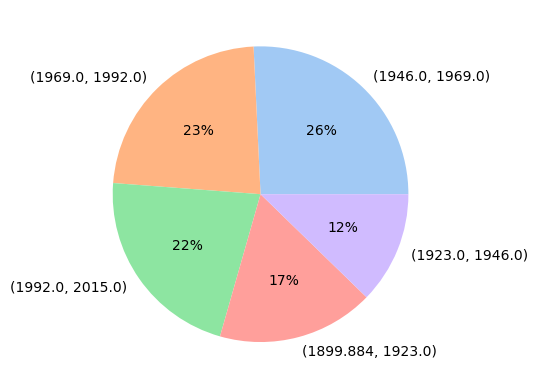

Si on considère 20% comme étant la proportion moyenne pour 5 catégories, alors les 3 catégories les plus récentes se situent au dessus de la moyenne et les 2 plus vieilles se situent en dessous. Malgrés tout, on a tout de même affaire pour les 3 catégories les plus jeunes à des proportions assez proche.

<AxesSubplot:xlabel='count', ylabel='PrimaryPropertyType'>

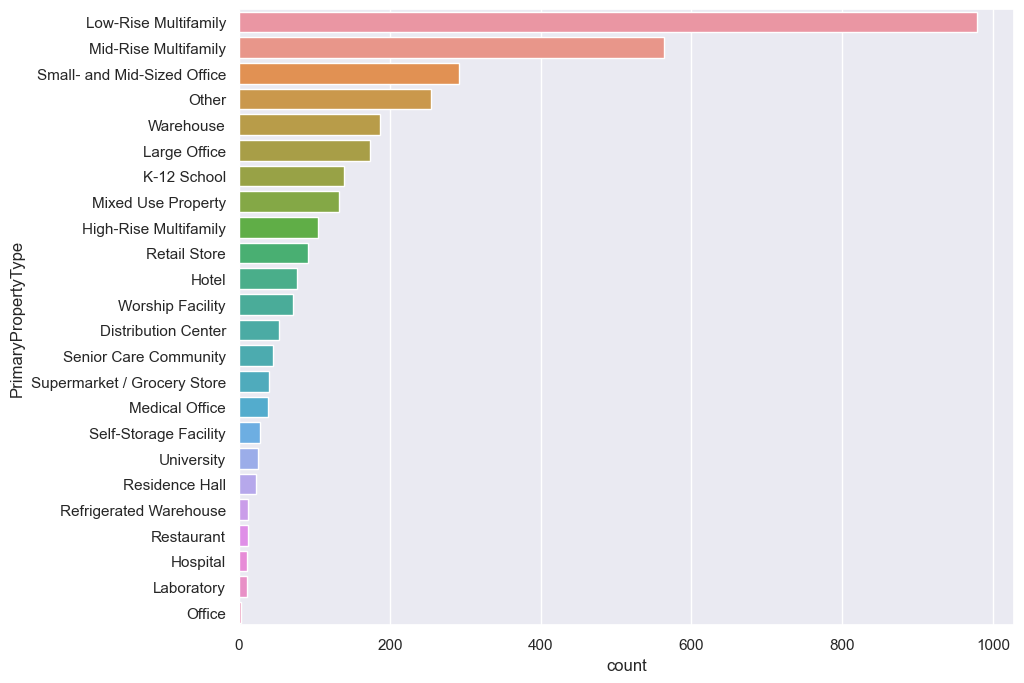

In [289]:
sns.countplot(y=data['PrimaryPropertyType'], order=data['PrimaryPropertyType'].value_counts().index)

On observe une grande proportion de bureau, d'entrepôts et d'écoles. On voit aussi une moyenne proportion de magasins, de lieu de cultes ainsi que d'hotel. Enfin on a une petite proportion de centres médicaux/hopitaux, de restaurant et de laboratoire.

<AxesSubplot:xlabel='count', ylabel='Neighborhood'>

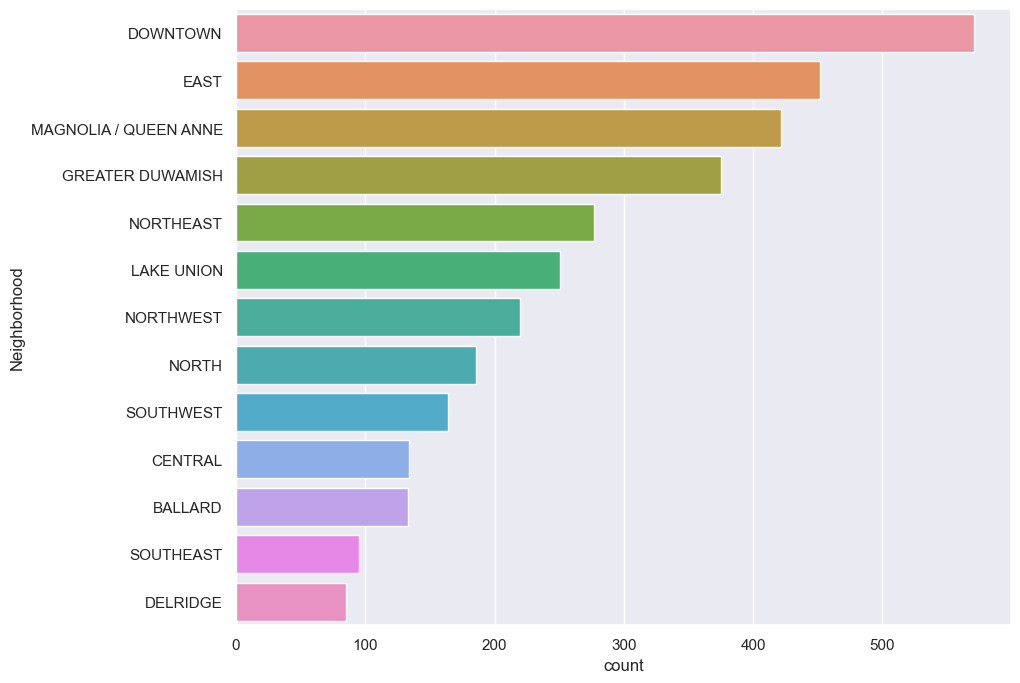

In [290]:
#Proportion de propriété par quartier
sns.countplot(y=data['Neighborhood'], order=data['Neighborhood'].value_counts().index)

On observe une inégalité de proportion entre les plus grands (Downtown, Greater Duwamish) avec environ 350 propriétés et les plus petits (Central, North, Delridge, Southeast et Southwest) avec environ 50 propriétés.

## Variables quantitatives

In [291]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YearBuilt,3365.0,1.968562e+03,3.310709e+01,1900.00000,1948.00000,1.975000e+03,1.997000e+03,2.015000e+03
Latitude,3365.0,4.762398e+01,4.774656e-02,47.49917,47.59986,4.761866e+01,4.765708e+01,4.773387e+01
Longitude,3365.0,-1.223348e+02,2.717774e-02,-122.41425,-122.35066,-1.223325e+02,-1.223195e+02,-1.222210e+02
NumberofFloors,3365.0,4.687964e+00,5.253682e+00,1.00000,2.00000,4.000000e+00,5.000000e+00,7.600000e+01
PropertyGFATotal,3365.0,9.462561e+04,2.180109e+05,11285.00000,28492.00000,4.423000e+04,9.112800e+04,9.320156e+06
PropertyGFAParking,3365.0,8.022695e+03,3.237688e+04,0.00000,0.00000,0.000000e+00,0.000000e+00,5.126080e+05
PropertyGFABuilding(s),3365.0,8.660291e+04,2.070229e+05,3636.00000,27760.00000,4.322800e+04,8.438900e+04,9.320156e+06
LargestPropertyUseTypeGFA,3365.0,7.884543e+04,2.007301e+05,5656.00000,25096.00000,3.990000e+04,7.610500e+04,9.320156e+06
SecondLargestPropertyUseTypeGFA,3365.0,1.398837e+04,3.928941e+04,0.00000,0.00000,0.000000e+00,1.063100e+04,6.399310e+05
ThirdLargestPropertyUseTypeGFA,3365.0,2.079123e+03,1.312465e+04,0.00000,0.00000,0.000000e+00,0.000000e+00,4.597480e+05


Observons la proportion du nombre d'activité par propriété :
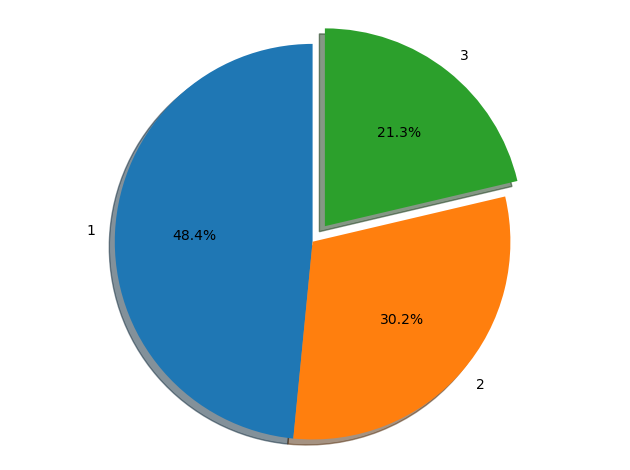

On a donc environ 50% des propriétés ayant une seule activité, 30% ayant 2 activités et 20% ayant 3 activités.

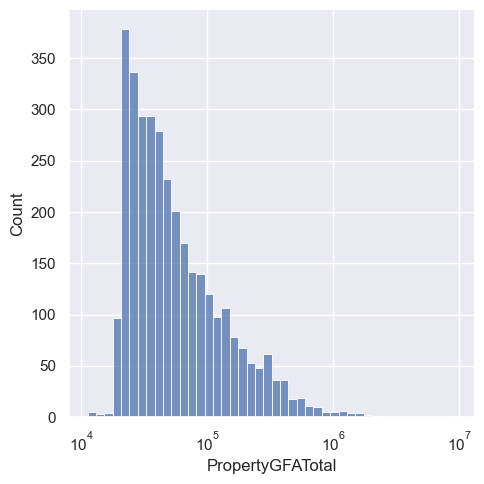

In [292]:
#On affiche le diagramme en bâton de la surface total des propriétés
sns.displot(data=data, x='PropertyGFATotal', log_scale=True)

On remarque qu'environ 2/3 des propriétés ont une surface de plancher brut comprisent entre 10 000 et 100 000 (pieds carrés bruts) tandis que le dernier tiers des propriétés ont une surface de plancher brut comprisent entre 100 000 et 1 000 000 (pieds carrés bruts).

<AxesSubplot:xlabel='NumberofFloors', ylabel='Count'>

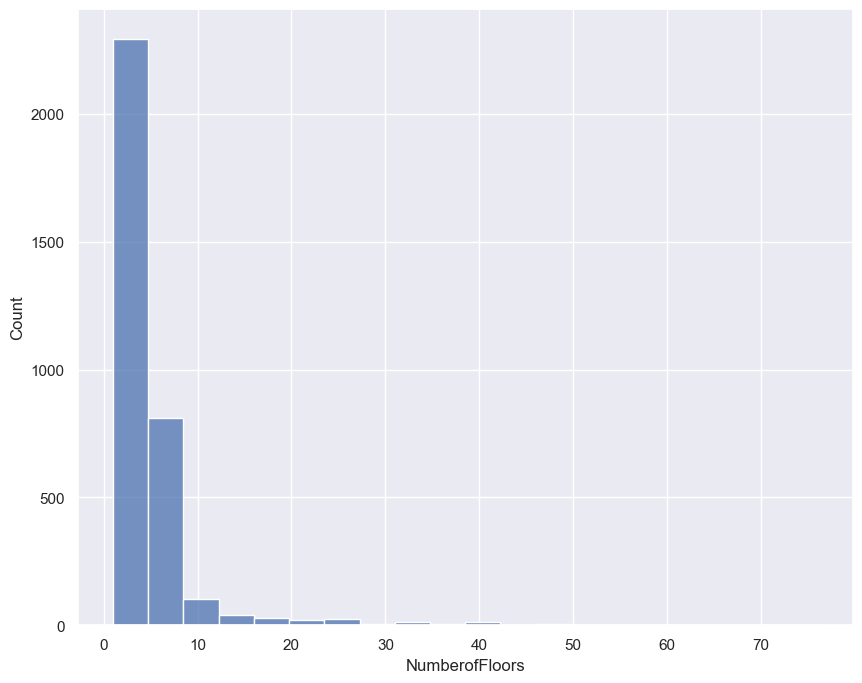

In [293]:
sns.histplot(data=data, x='NumberofFloors', bins = 20)

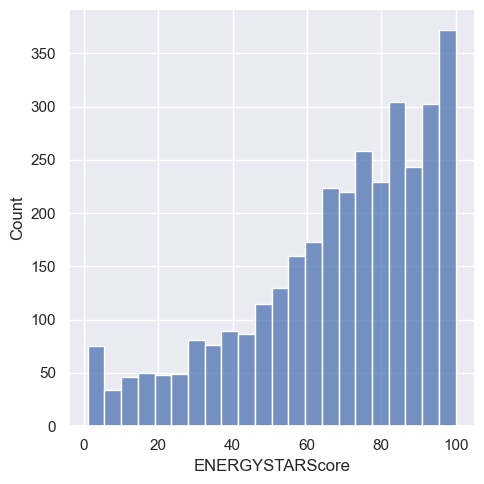

In [294]:
#Proportion d'individu par tranche de ENERGYSTARScore
sns.displot(data=data, x='ENERGYSTARScore', log_scale=False)

On observe que la proportion de propriété augmente avec l'ENERGYSTARScore.

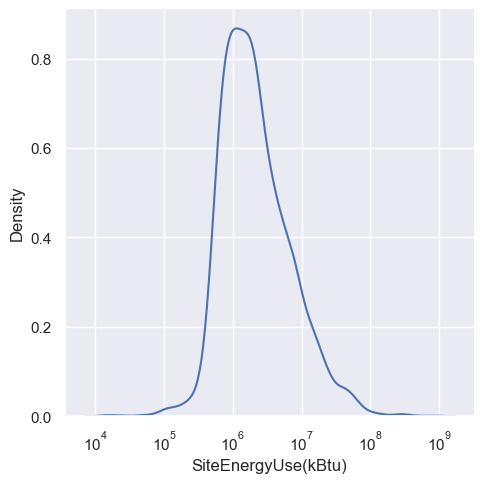

In [295]:
#Distribution de l'énergie utilisée (échelle logarithmique)
sns.displot(data=data[data['SiteEnergyUse(kBtu)'] != 0], x='SiteEnergyUse(kBtu)', kind="kde", log_scale=True)

Avec l'échelle logarithmique on observe que la distribution de l'énergie utilisée par les propriétés suit une loi normale. Il conviendra donc de modifier cette variable lors de la modélisation afin d'en améliorer les résultats.

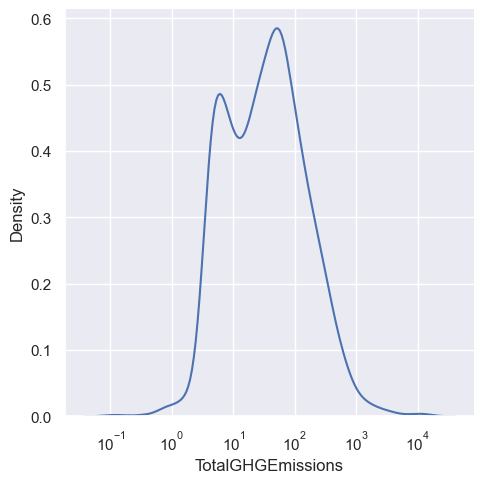

In [296]:
#Distribution de l'émission de gaz à effet de serre (échelle logarithmique)
sns.displot(data=data[data['TotalGHGEmissions'] > 0], x='TotalGHGEmissions', kind="kde", log_scale=True)

Avec l'échelle logarithmique on observe que la distribution de l'émission de gaz à effet de serre par les propriétés suit une loi normale. On émet alors l'hypothèse qu'il existe un lien entre l'émission de gaz à effet de serre et l'énergie totale utilisée.

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

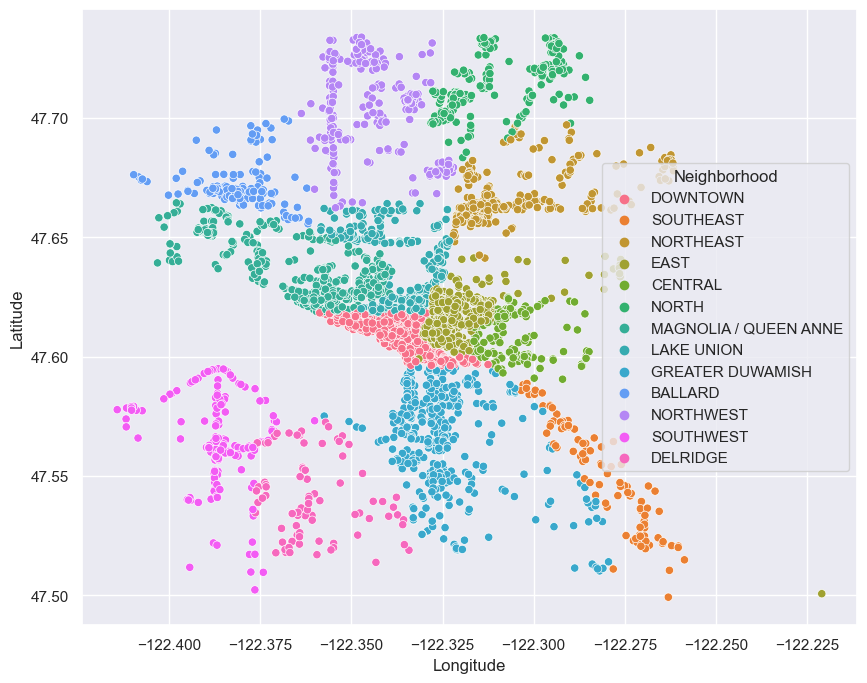

In [297]:
sns.scatterplot(data=data, x='Longitude', y='Latitude', hue='Neighborhood')

# Analyse bivariée

## Variables quantitatives / quantitatives

<AxesSubplot:>

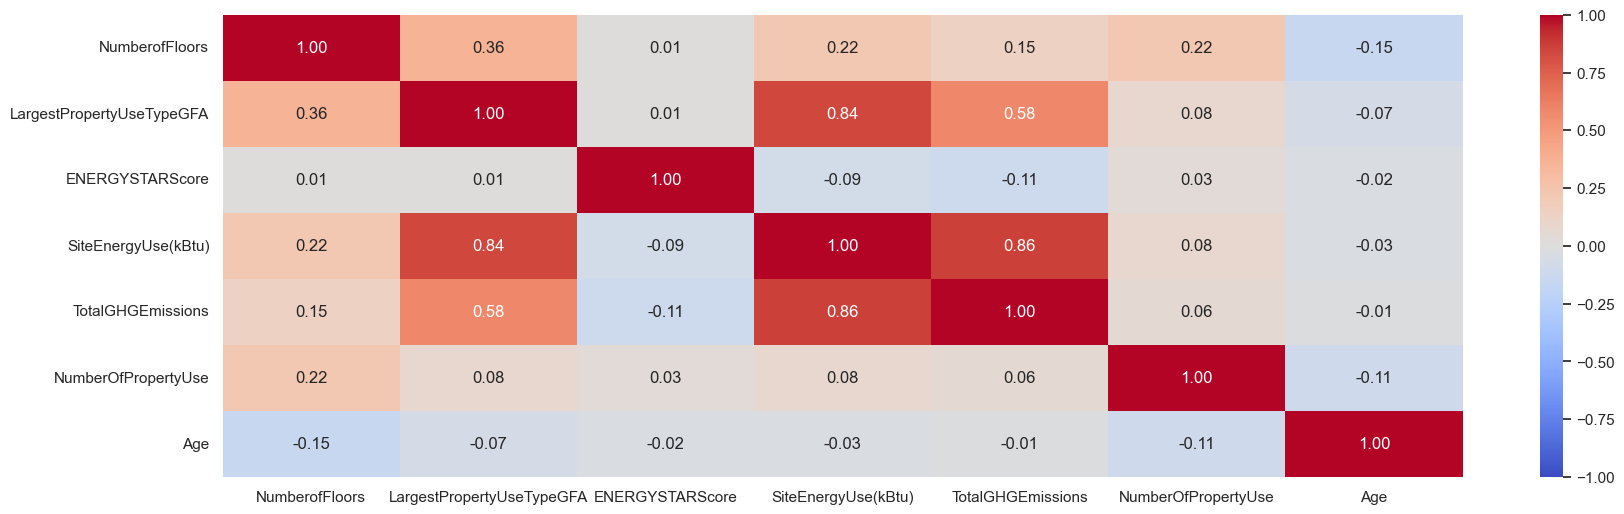

In [298]:
#On commence par afficher le tableau des corrélations de nos variables numériques principales

corr = data[['NumberofFloors','LargestPropertyUseTypeGFA',  'ENERGYSTARScore', 
             'SiteEnergyUse(kBtu)','TotalGHGEmissions', 'NumberOfPropertyUse', 'Age']].corr()
#On met en évidence les variables initiales les plus corrélées à nos 4 'GHGEmissionsIntensity'axes
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

On observe qu'il y a corrélation entre :
- La surface brut de la plus grande activité de la propriété et son utilisation en énergie (Donc plus une activité est grande au sens de sa surface plus elle consomme de l'énergie). 
- La surface brut de la plus grande activité et l'émission total de gaz à effet de serre (Donc plus une activité est grande au sens de sa surface plus elle produit de gaz à effet de serre).
- L'énergie utilisée par la propriété ainsi que son émission de gaz à effet de serre (corrélée à 0.86).
\
\
Cependant ni l'âge de la propriété ni son nombre d'activité n'a l'air d'avoir un impact sur sa consommation en énergie et son émission de gaz à effet de serre. Enfin, on remarque que l'ENERGYSTARScore n'est corrélée à aucune variable.

<AxesSubplot:>

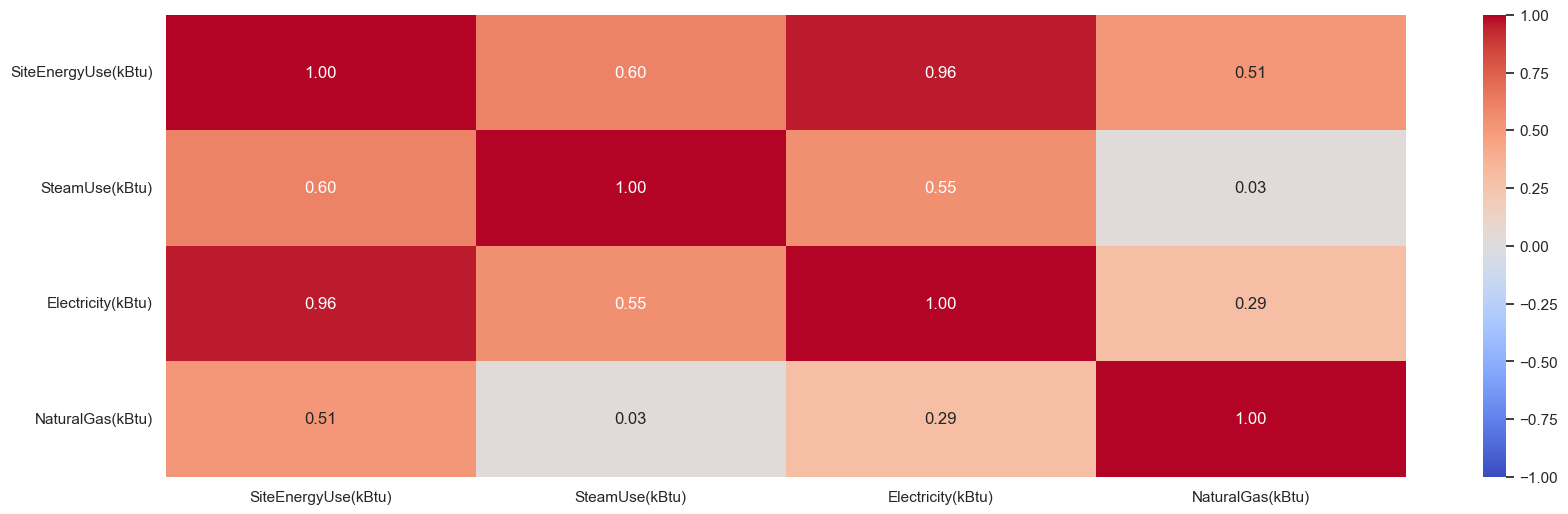

In [299]:
#On commence par afficher le tableau des corrélations de nos variables numériques principales

corr = data[['SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 
                                         'Electricity(kBtu)', 'NaturalGas(kBtu)']].corr()
#On met en évidence les variables initiales les plus corrélées à nos 4 'GHGEmissionsIntensity'axes
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

L'énergie consommée par les propriétés est très corrélées à l'éléctricité (à 96%), à la vapeur (à 61%) et enfin au gaz (50%).

<AxesSubplot:>

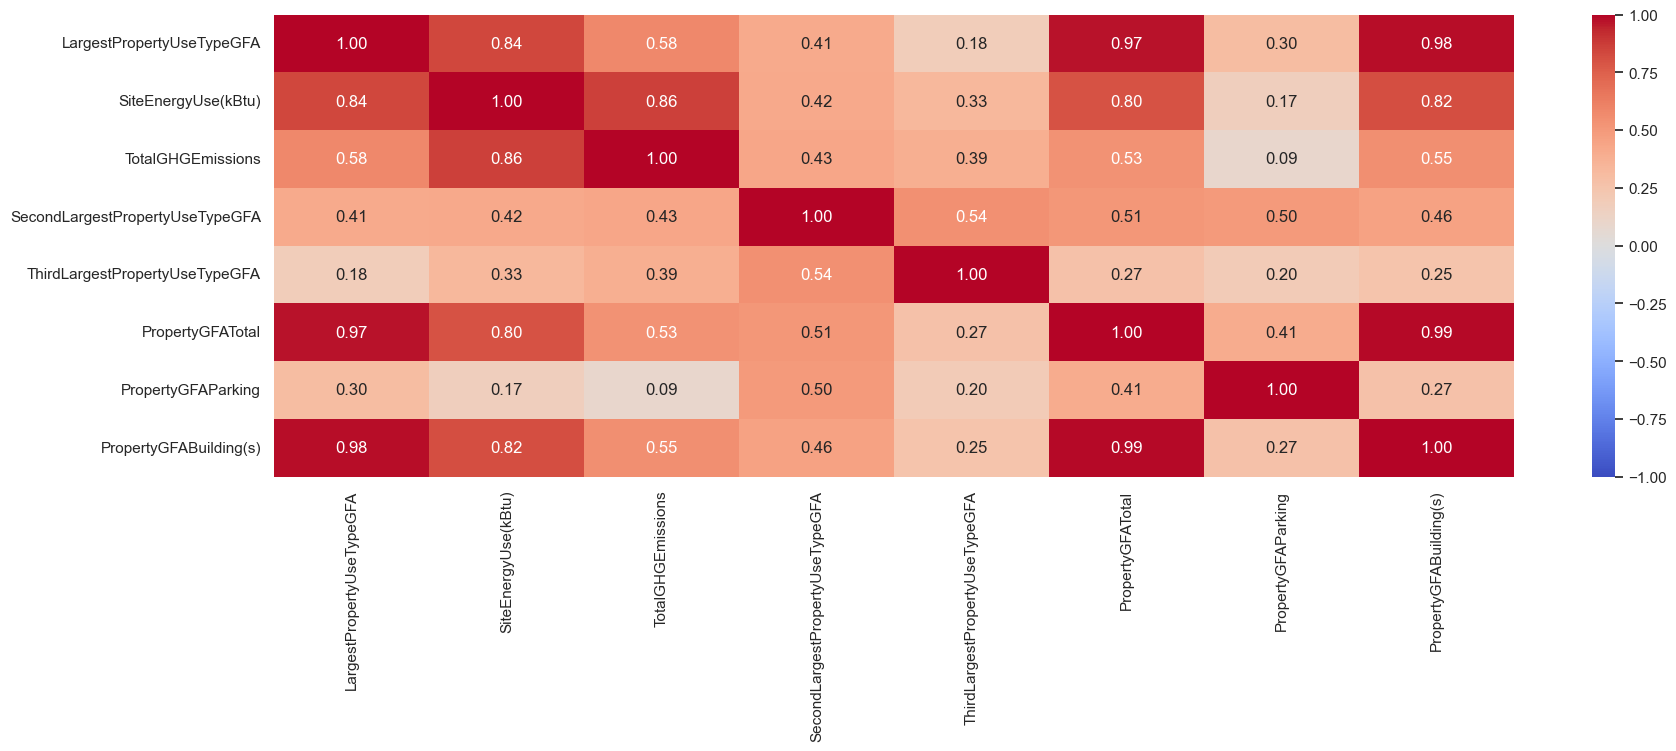

In [300]:
#Affichage des variables de surface et de l'émission en gaz à effet de serre / consommation en énergie

corr = data[['LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)','TotalGHGEmissions', 'SecondLargestPropertyUseTypeGFA', 
             'ThirdLargestPropertyUseTypeGFA', 'PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)']].corr()
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

On observe de forte corrélation entre les variables de surface et nos deux variables cibles. On pourrait penser que c'est un problème de data leakage, ce n'est pourtant pas le cas. En effet, bien que les corrélations soient importante on ne considère pas qu'il y a une "fuite" de donnée des variables explicatives vers les variables expliquées. Les variables de surface sont des données structurelles qu'il nous faut considérer lors de notre prédiction.

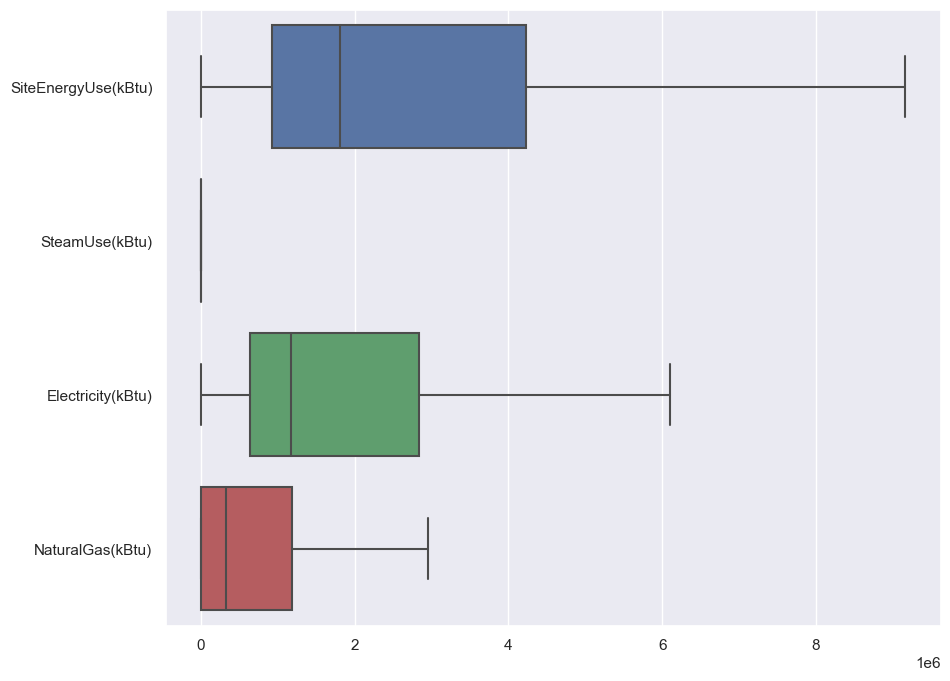

In [301]:
#Boite à moustache de l'énergie, vaperur, éléctricité et gaz consommée
sns.boxplot(showfliers=False, data=data[['SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 
                                         'Electricity(kBtu)', 'NaturalGas(kBtu)']], orient="h");

On observe qu'une très petite proportion d'individu utilise de la vapeur tandis qu'une grande majorité utilise de l'éléctricité. On voit par ailleurs que l'éléctricité utilisée suit une distribution quasiment identique à celle de l'énergie utilisé. On peut donc penser en plus de la forte corrélation entre les deux (de 96%) que la très grande majorité des propriétés utilise de l'éléctricité, mais en plus elle reste l'unique source d'énergie utilisée pour une majorité d'entre elles (Pour l'autre elle consomme également du gaz et une minorité de la vapeur).

## Variables qualitatives / qualitatives

On va tenter de voir s'il existe un lien entre le quartier et les types de propriétés. Pour ce faire on produit une table de contingence.

<AxesSubplot:xlabel='Neighborhood', ylabel='PrimaryPropertyType'>

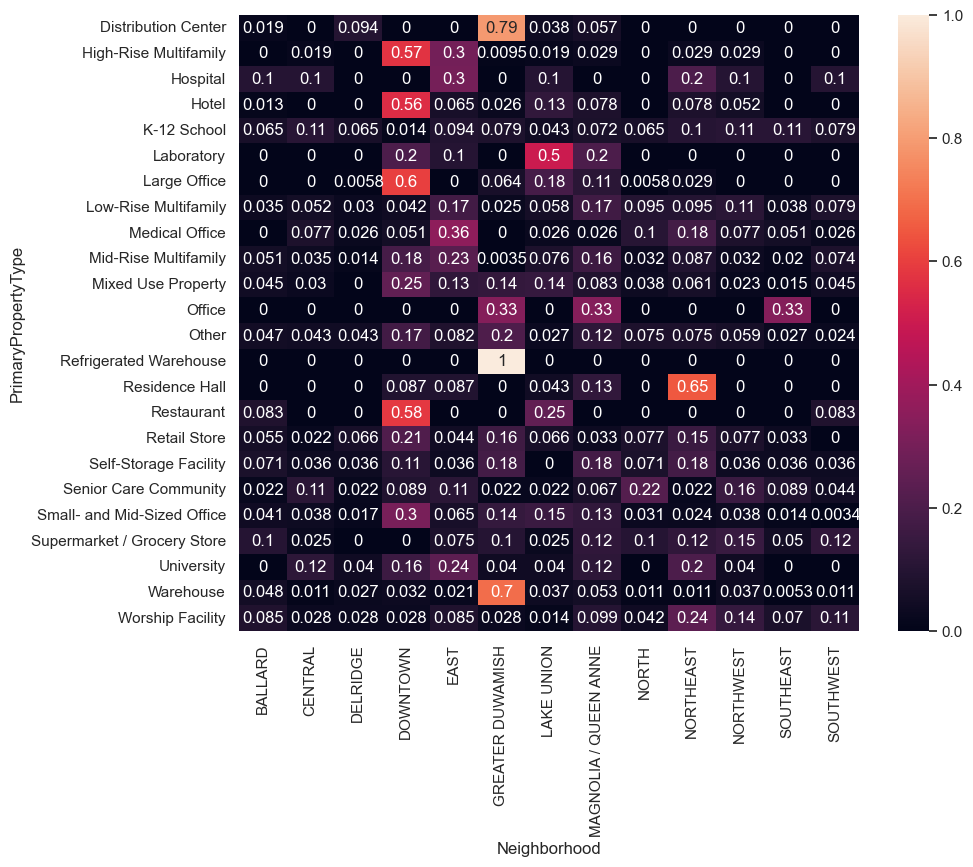

In [302]:
#Table de contingence du type de propriété et du quartier
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(pd.crosstab(data['PrimaryPropertyType'], data['Neighborhood'], normalize='index'), annot=True)

Cette table de contingence nous apprends que les deux plus grands quartiers (Greater Duwamish et Downtown) attirent une grande diversité de type de propriété. En effet, Downtown possède beaucoup de bureau, de restaurant et d'hôtel (On peut s'attendre à un quartier des affaires). Aussi, Greater Duwamish possède beaucoup d'entrepôts (avec l'intégralité des entrepôts réfrigérés) ainsi que beaucoup de centre de distribution.
\
On a a l'inverse des quartiers avec très peu de type de propriété à l'image de Southwest n'ayant pas de type de propriété particulière. On suppose donc qu'il y a un lien entre le quartier et le type de propriété qu'on y trouve. Confirmons (ou infirmons cette hypothèse par un test de Khi-2).

In [303]:
from scipy.stats import chi2_contingency as chi2_contingency

khi2, pval , ddl , contingent_theorique = chi2_contingency(pd.crosstab(data['PrimaryPropertyType'], data['Neighborhood']))
print(pval)

0.0


On a une pvalue très petite, cela signifie qu'il existe un lien entre le quartier et le type de propriété qu'on y trouve.

On peut alors également se demander si il existe un lien entre le quartier et l'année de création de ses propriétés. Observons sur un countplot ce qu'il en est.

In [304]:
data['annees_tranches'] = pd.cut(data['YearBuilt'], 3)

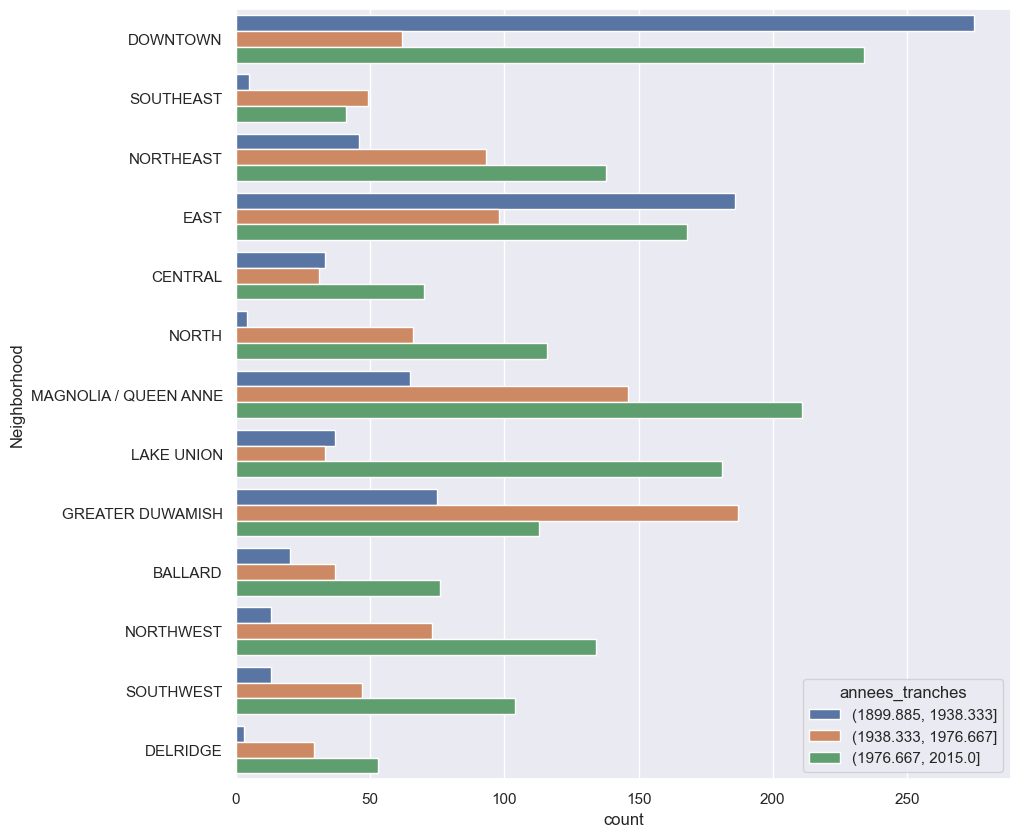

In [305]:
#Observons avec un countplot
plt.figure(figsize=(10, 10))
sns.countplot(y='Neighborhood', hue='annees_tranches', data=data);

On observe que les quartiers ont des proportions de propriétés vieilles, moyennement âgée et jeune assez différente. Par exemple, Downtown est le quartier ayant le plus de vieille propriété (East ayant une répartition assez proche). On remarque de plus que Grater Duwamish a une répartition différente avec des propriétés plutôt moyennement âgée. Pour Lake Union une grande partie des propriétés est assez jeune. On peut donc supposer qu'il existe un lien fort entre le quartier et l'âge de ses propriétés. Confirmons (ou infirmons) cette hypothèse en faisant un test du Khi-2.

In [306]:
khi2, pval , ddl , contingent_theorique = chi2_contingency(pd.crosstab(data['annees_tranches'], data['Neighborhood']))
print(pval)

2.8384103847737983e-120


La p-value étant ici aussi très petite on conclut donc sur le fait qu'il y a des quartiers plutôt vieux et d'autres plutôt jeune.

## Variables quantitatives / qualitatives

In [307]:
#ANOVA
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [308]:
#Liste des trois variables qualitatives que l'on veut croiser avec nos variables quantitatives
liste = ['PrimaryPropertyType', 'annees_tranches', 'Neighborhood']

### SiteEnergyUse

<AxesSubplot:xlabel='SiteEnergyUse(kBtu)', ylabel='PrimaryPropertyType'>

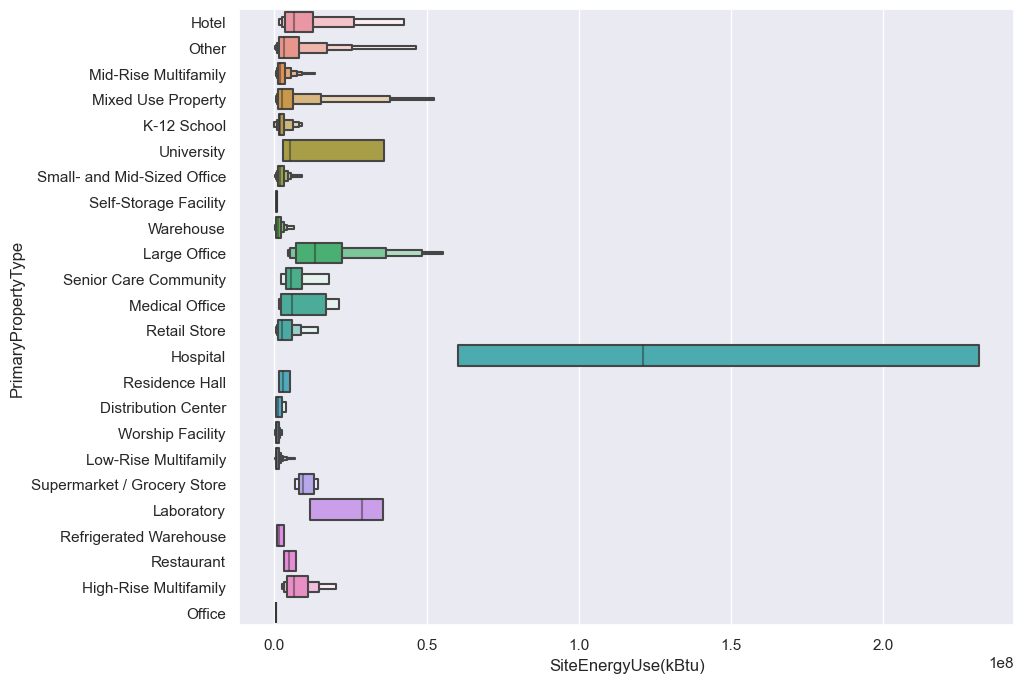

In [309]:
#Energie utilisée en fonction de l'activité de la propriété
sns.boxenplot(data=data, x='SiteEnergyUse(kBtu)', y ='PrimaryPropertyType', showfliers=False)

On remarque que la consommation en énergie est liée à l'activité de la propriété.

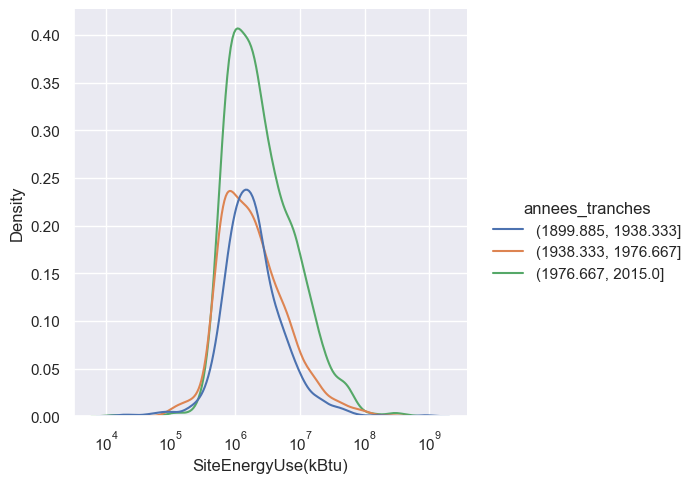

In [310]:
#Distribution de la consommation en énergie en fonction de l'âge des propriétés
sns.displot(data=data[data['SiteEnergyUse(kBtu)'] != 0], x='SiteEnergyUse(kBtu)', hue='annees_tranches', kind="kde", log_scale=True)

On ne remarque pas de lien particulié entre la consommation en énergie et l'âge de la propriété (forme identique).

<AxesSubplot:xlabel='SiteEnergyUse(kBtu)', ylabel='Neighborhood'>

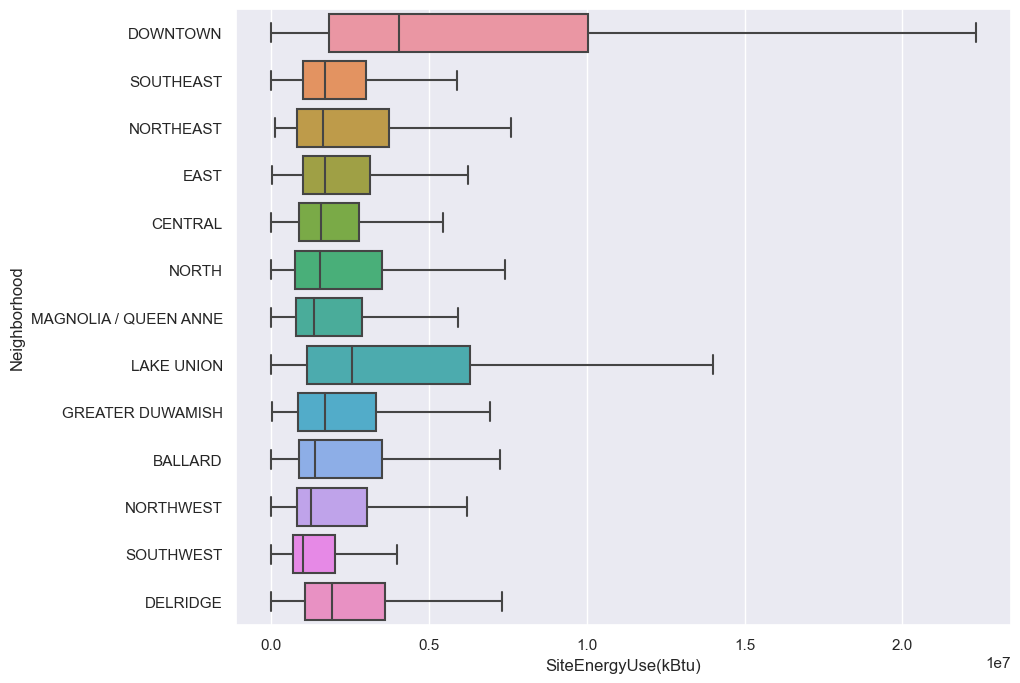

In [311]:
#Distribution de la consommation en énergie en fonction du quartier
sns.boxplot(data=data, x='SiteEnergyUse(kBtu)', y ='Neighborhood', showfliers=False)

Ici aussi, on ne remarque pas de lien particulier entre la consommation d'énergie et le quartier de provenance de la propriété.

In [312]:
#On affirme (ou infirme) nos hypothèses en utilisant l'ANOVA
for categ in liste:
    print(categ,'/','SiteEnergyUse(kBtu) :', round(eta_squared(data[categ], data['SiteEnergyUse(kBtu)']),2))

PrimaryPropertyType / SiteEnergyUse(kBtu) : 0.2
annees_tranches / SiteEnergyUse(kBtu) : 0.0
Neighborhood / SiteEnergyUse(kBtu) : 0.01


L'ANOVA confirme notre intuition qu'il existe un lien entre la consommation d'énergie et le type de propriété. Cependant il n'existe aucun lien entre la consommation d'énergie de la propriété et son âge / son quartier.

### PropertyGFATotal

<AxesSubplot:xlabel='PropertyGFATotal', ylabel='PrimaryPropertyType'>

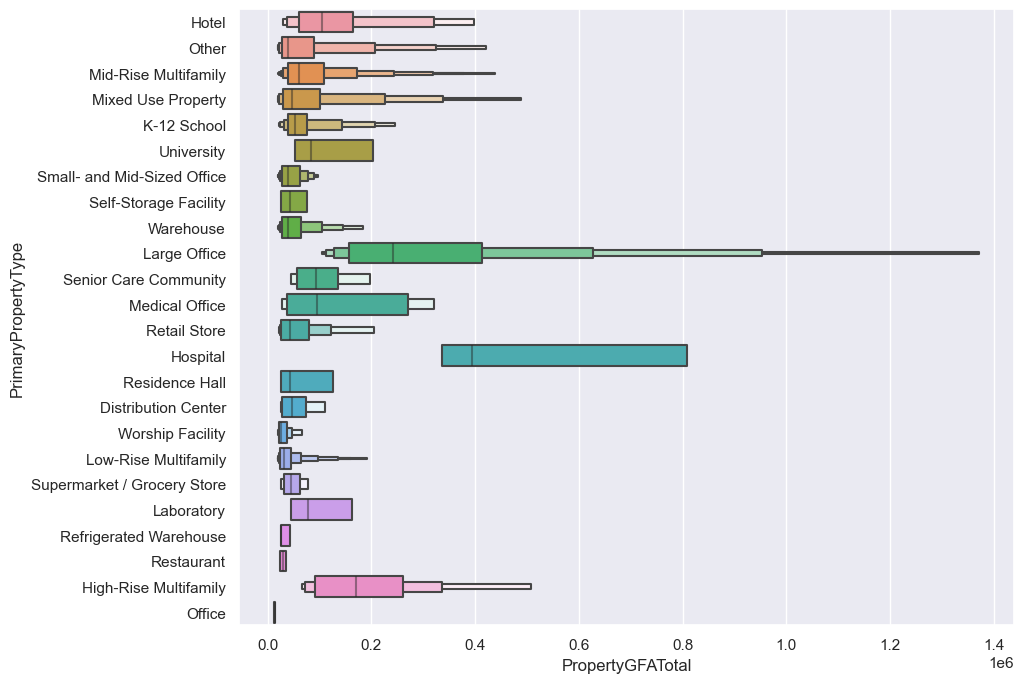

In [313]:
#Surface total de la propriété en fonction de son type
sns.boxenplot(data=data, x='PropertyGFATotal', y ='PrimaryPropertyType', showfliers=False)

On pose l'hypothèse qu'il y a un lien entre la surface d'une propriété et son type (Large Office et Hopitaux significativement plus grand tandis que les lieux de cultes et restaurant significativement plus petit).

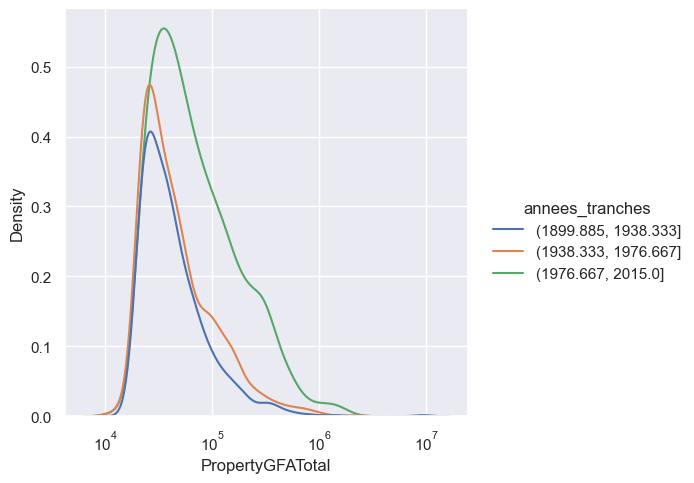

In [314]:
#Distribution de la surface total de la propriété en fonction de son âge
sns.displot(data=data[data['PropertyGFATotal'] != 0], x='PropertyGFATotal', hue='annees_tranches', kind="kde", log_scale=True)

On observe 3 distributions identique, donc des comportements similaire en fonction des âges. On pense donc qu'il n'existe aucun lien entre l'âge d'une propriété et sa surface.

<AxesSubplot:xlabel='PropertyGFATotal', ylabel='Neighborhood'>

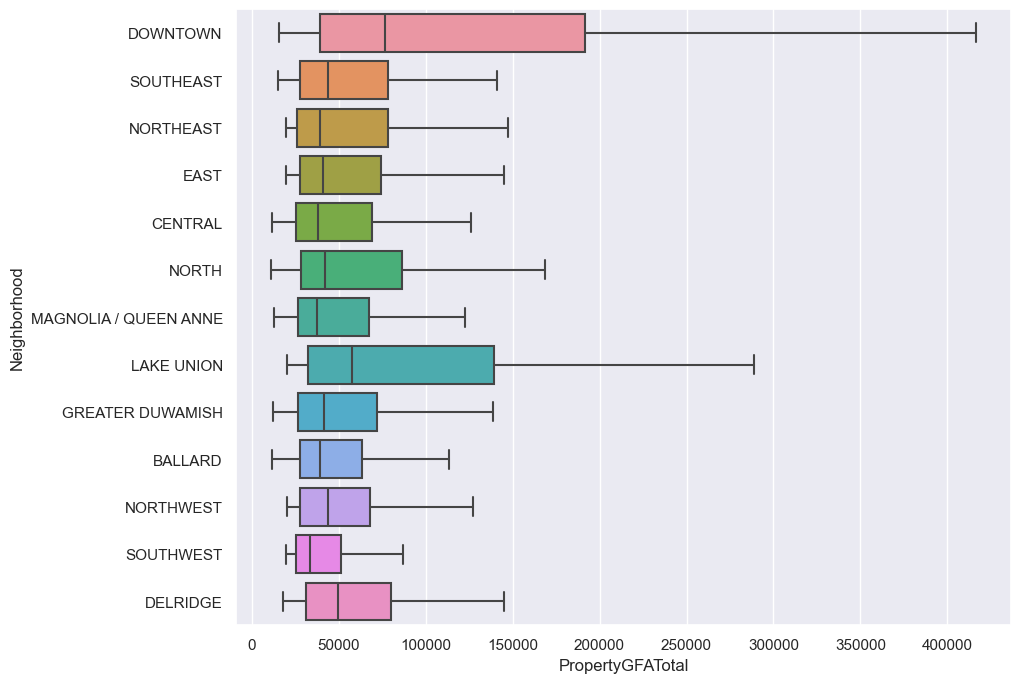

In [315]:
#Distribution de la surface des propriétés en fonction du quartier de provenance
sns.boxplot(data=data, x='PropertyGFATotal', y ='Neighborhood', showfliers=False)

On ne remarque pas de différence de distribution significative en fonction du quartier de provenance. On émet donc l'hypothèse d'indépendance entre la surface totale de la propriété et le quartier.

In [316]:
#On utilise le modèle ANOVA pour afirmer (ou infirmer) nos hypothèses
for categ in liste:
    print(categ,'/','PropertyGFATotal :', round(eta_squared(data[categ], data['PropertyGFATotal']),2))

PrimaryPropertyType / PropertyGFATotal : 0.17
annees_tranches / PropertyGFATotal : 0.01
Neighborhood / PropertyGFATotal : 0.03


On observe en effet que le type de propriété influe significativement sur la surface de cette dernière. Cependant, son âge ainsi que son quartier n'a aucun impact dessus.

### TotalGHGEmissions

<AxesSubplot:xlabel='TotalGHGEmissions', ylabel='PrimaryPropertyType'>

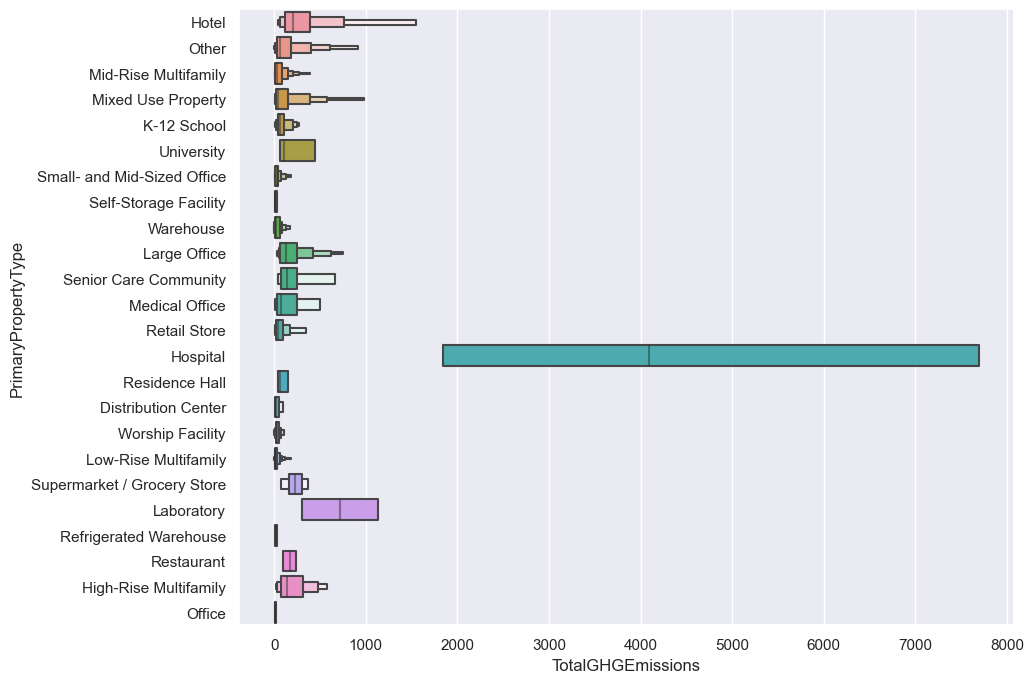

In [317]:
#Distribution de l'émission en gaz à effet de serre en fonction du type de propriété
sns.boxenplot(data=data, x='TotalGHGEmissions', y ='PrimaryPropertyType', showfliers=False)

On observe une certaine variance d'émission en gaz à effet de serre entre les différents type de propriété. On suppose ici aussi que nos variables sont liées.

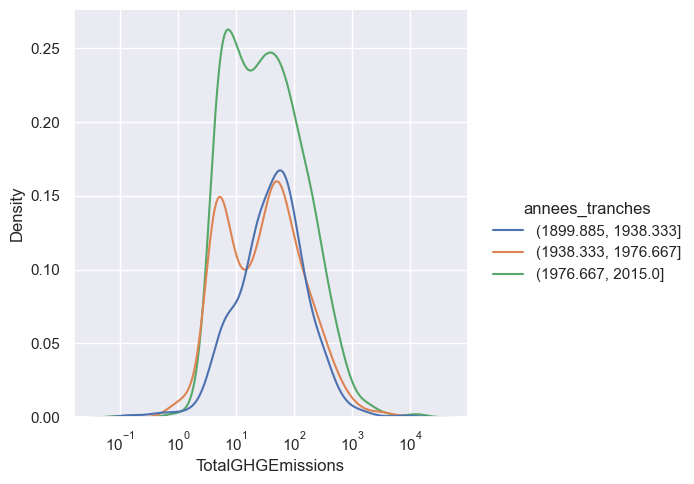

In [318]:
#Distribution de l'émission en gaz à effet de serre en fonction de l'âge
sns.displot(data=data[data['TotalGHGEmissions'] > 0], x='TotalGHGEmissions', hue='annees_tranches', kind="kde", log_scale=True)

On observe pas de différence significative entre les 3 courbes, on pense donc que l'âge n'influe pas sur l'émissions totale en gaz à effet de serre.

<AxesSubplot:xlabel='TotalGHGEmissions', ylabel='Neighborhood'>

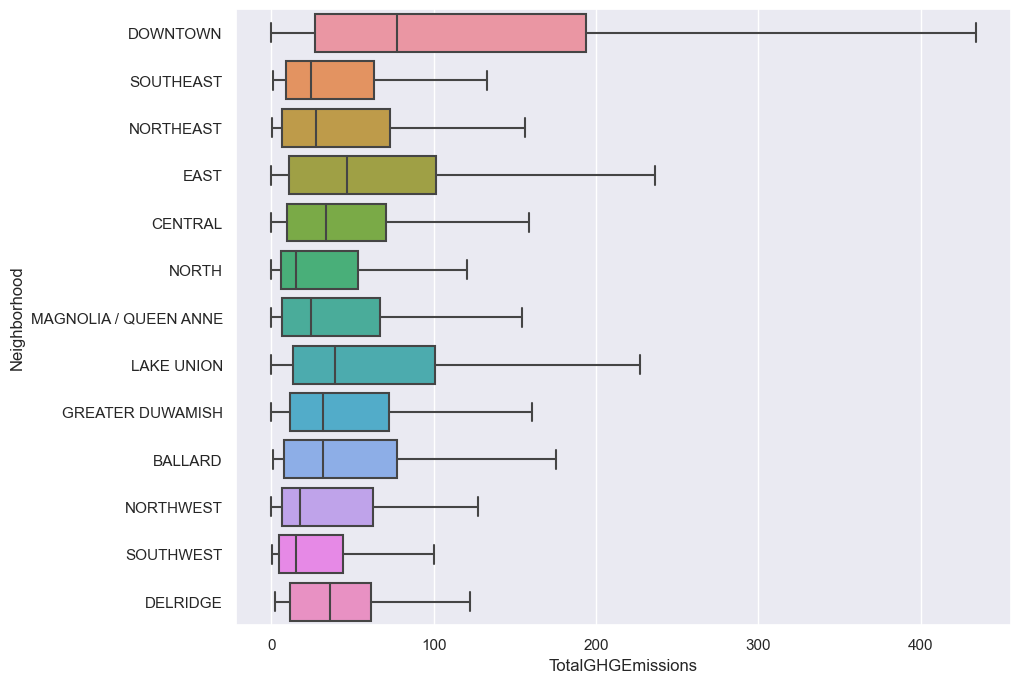

In [319]:
#Distribution de l'émission en gaz à effet de serre en fonction du quartier
sns.boxplot(data=data, x='TotalGHGEmissions', y ='Neighborhood', showfliers=False)

Le quartier de la propriété n'a pas l'air d'être lié à l'émission en gaz à effet de serre de la propriété.

In [320]:
#On confirme (ou infirme) nos hypothèses
for categ in liste:
    print(categ,'/','TotalGHGEmissions :', round(eta_squared(data[categ], data['TotalGHGEmissions']),2))

PrimaryPropertyType / TotalGHGEmissions : 0.3
annees_tranches / TotalGHGEmissions : 0.0
Neighborhood / TotalGHGEmissions : 0.01


Ici aussi, seul le type de propriété à un impact sur son émission en gaz à effet de serre.

### ENERGYSTARScore

<AxesSubplot:xlabel='ENERGYSTARScore', ylabel='PrimaryPropertyType'>

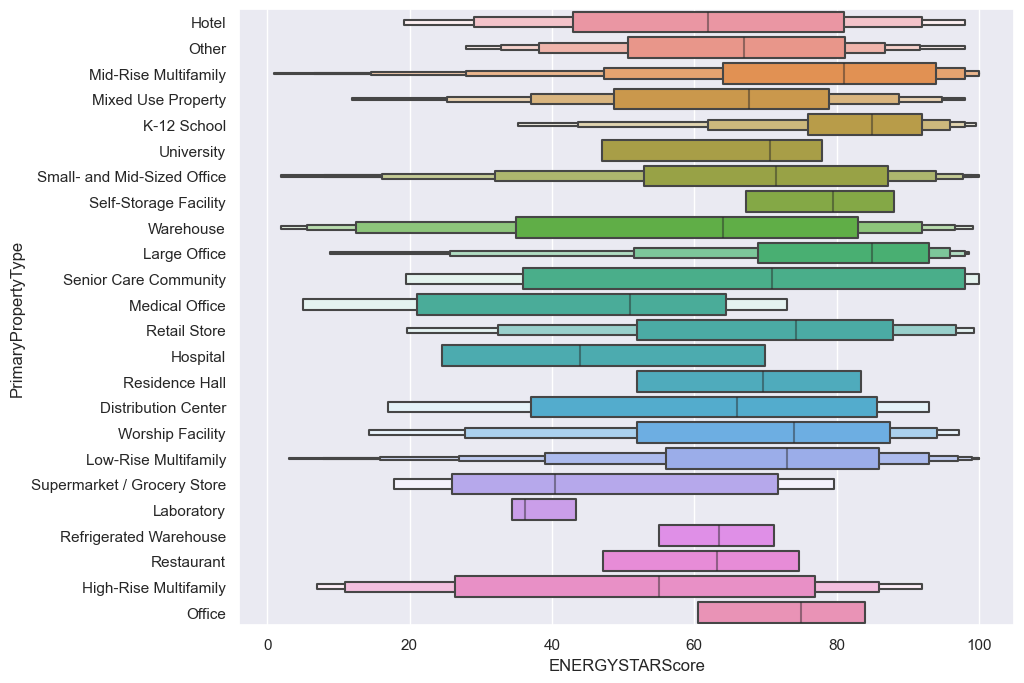

In [321]:
#Distribution de l'ENERGYSTARScore en fonction du type de propriété
sns.boxenplot(data=data, x='ENERGYSTARScore', y ='PrimaryPropertyType', showfliers=False)

On observe de légère différence de distribution de l'ENERGYSTARScore en fonction du type de propriété. On peut donc penser qu'il y a un lien entre les deux variables.

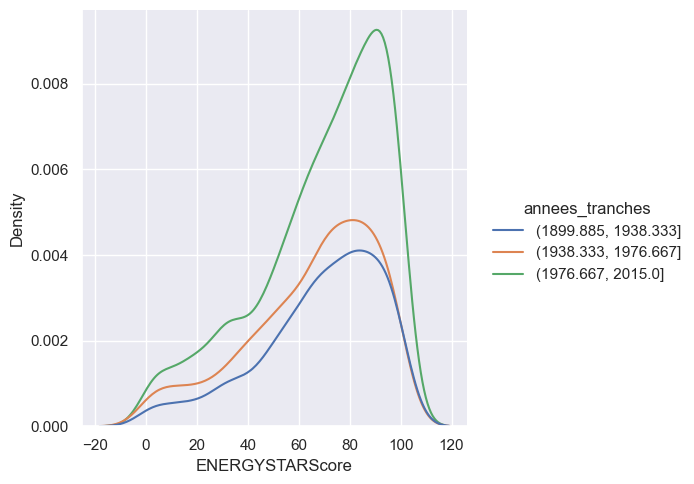

In [322]:
#Distribution de l'ENERGYSTARScore en fonction de l'âge de la propriété
sns.displot(data=data, x='ENERGYSTARScore', hue='annees_tranches', kind="kde")

La distribution est sensiblement la même en fonction des âges ce qui nous laisse penser qu'aucun lien n'existe entre ces deux variables.

<AxesSubplot:xlabel='ENERGYSTARScore', ylabel='Neighborhood'>

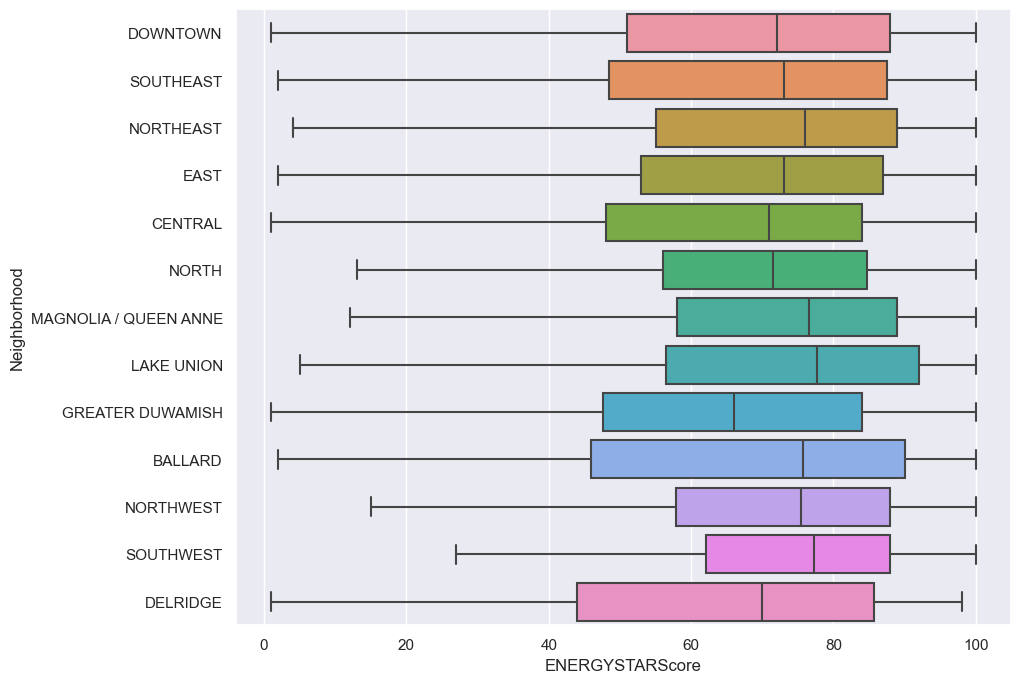

In [323]:
#Distribution de l'ENERGYSTARScore en fonction du quartier de la propriété
sns.boxplot(data=data, x='ENERGYSTARScore', y ='Neighborhood', showfliers=False)

La distribution est sensiblement la même entre chacun des quartiers. Le quartier d'origine n'a donc pas l'air d'avoir d'impact sur l'ENERGYSTARScore.

In [324]:
#On confirme (ou infirme) nos hypothèse par l'ANOVA
for categ in liste:
    print(categ,'/','ENERGYSTARScore :', round(eta_squared(data[categ], data['ENERGYSTARScore']),2))

PrimaryPropertyType / ENERGYSTARScore : 0.08
annees_tranches / ENERGYSTARScore : 0.0
Neighborhood / ENERGYSTARScore : 0.01


Le type de propriété semble avoir un léger impact sur l'ENERGYSTARScore tandis que l'âge / le quartier ne semblent pas en avoir.

# Data Leakage

Considérons les variables suivantes : 
- SiteEUI(kBtu/sf)
- SteamUse(kBtu)
- Electricity(kBtu)
- NaturalGas(kBtu)
- GHGEmissionsIntensity
\
\
Chacune d'entre elles est non seulement très corrélées aux variables cibles (SiteEnergyUse(kBtu) et TotalGHGEmissions) mais en plus ces données ne sont pas censées être connue lors de la modélisation. En effet, connaitre la consommation en éléctricité, gaz et vapeur nous donne directement la consommation totale en énergie, et par la même occasion l'émission en gaz à effet de serre. On décide donc de supprimer ces variables.

In [325]:
data = data[['NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'Age',
       'NumberOfPropertyUse', 'Steam', 'Electricity', 'Gas', 'LargestPropertyUseType', 'PrimaryPropertyType', 
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'Neighborhood', 'BuildingType', 'TotalGHGEmissions']]

In [326]:
#On exporte notre dataframe data en 'data_traitement.csv'
data.to_csv("data_traitement.csv", index=False)